In [3]:
import pandas as pd
import numpy as np

In [13]:
file_path = r"C:\Users\utkar\LFB Lithium and Electric Vehicle fire data.xlsx"

In [17]:
df = pd.read_excel(file_path)

In [19]:
df.head()

,IncidentNumber,CalendarYear,MonthText,Type,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,VehiclePowerType,VehicleManufacturer,IncGeo_BoroughName,IncGeo_WardName,IncGeo_WardCode,Lithium batteries mentioned in report?
0,000285-01012017,2017,Jan,Other Lithium Battery,Electricity,Other appliance or equipment,Other item,NaN,NaN,BARKING AND DAGENHAM,Thames View,E05014068,Yes
1,000641-02012017,2017,Jan,Other Lithium Battery,Unknown,Not known,Plastic - raw material only,NaN,NaN,HOUNSLOW,Osterley & Spring Grove,E05013626,Yes
2,005511-13012017,2017,Jan,Car,Electricity,"Batteries, generators",Rubber - raw material only,NaN,Mercedes,NEWHAM,Plaistow West & Canning Town East,E05013920,No
3,006064-15012017,2017,Jan,Car,Electricity,"Batteries, generators",Plastic - raw material only,NaN,Mercedes,HAMMERSMITH AND FULHAM,Ravenscourt,E05013746,No
4,007635-18012017,2017,Jan,e-scooter,Electricity,"Batteries, generators",Wiring insulation,NaN,NaN,ISLINGTON,Mildmay,E05013709,No


In [21]:
df.isnull().sum()

IncidentNumber                               0
CalendarYear                                 0
MonthText                                    0
Type                                         0
IgnitionSourcePower                         12
IgnitionSource                              12
ItemFirstIgnited                            44
VehiclePowerType                          1047
VehicleManufacturer                        849
IncGeo_BoroughName                           0
IncGeo_WardName                              6
IncGeo_WardCode                              6
Lithium batteries mentioned in report?       0
dtype: int64

In [27]:
df.columns

Index(['IncidentNumber', 'CalendarYear', 'MonthText', 'Type',
       'IgnitionSourcePower', 'IgnitionSource', 'ItemFirstIgnited',
       'VehiclePowerType', 'VehicleManufacturer', 'IncGeo_BoroughName',
       'IncGeo_WardName', 'IncGeo_WardCode',
       'Lithium batteries mentioned in report?'],
      dtype='object')

In [29]:
df.drop(columns=[
    'IncidentNumber',
    'MonthText',
    'IncGeo_BoroughName',
    'IncGeo_WardName',
    'IncGeo_WardCode'
], inplace=True)

In [31]:
df.columns

Index(['CalendarYear', 'Type', 'IgnitionSourcePower', 'IgnitionSource',
       'ItemFirstIgnited', 'VehiclePowerType', 'VehicleManufacturer',
       'Lithium batteries mentioned in report?'],
      dtype='object')

In [37]:
df.isnull().sum()

CalendarYear                                 0
Type                                         0
IgnitionSourcePower                         12
IgnitionSource                              12
ItemFirstIgnited                            44
VehiclePowerType                          1047
VehicleManufacturer                        849
Lithium batteries mentioned in report?       0
dtype: int64

In [39]:
df['IgnitionSourcePower'] = df['IgnitionSourcePower'].fillna('Unknown')
df['IgnitionSource'] = df['IgnitionSource'].fillna('Unknown')
df['ItemFirstIgnited'] = df['ItemFirstIgnited'].fillna('Unknown')
df['VehiclePowerType'] = df['VehiclePowerType'].fillna('Unknown')
df['VehicleManufacturer'] = df['VehicleManufacturer'].fillna('Unknown')


In [43]:
df['Target'] = df['Lithium batteries mentioned in report?'].apply(lambda x: 1 if x == 'Yes' else 0)
df.drop(columns=['Lithium batteries mentioned in report?'], inplace=True)

In [45]:
df.head()

,CalendarYear,Type,IgnitionSourcePower,IgnitionSource,ItemFirstIgnited,VehiclePowerType,VehicleManufacturer,Target
0,2017,Other Lithium Battery,Electricity,Other appliance or equipment,Other item,Unknown,Unknown,1
1,2017,Other Lithium Battery,Unknown,Not known,Plastic - raw material only,Unknown,Unknown,1
2,2017,Car,Electricity,"Batteries, generators",Rubber - raw material only,Unknown,Mercedes,0
3,2017,Car,Electricity,"Batteries, generators",Plastic - raw material only,Unknown,Mercedes,0
4,2017,e-scooter,Electricity,"Batteries, generators",Wiring insulation,Unknown,Unknown,0


In [60]:
df.isnull().sum()

CalendarYear           0
Type                   0
IgnitionSourcePower    0
IgnitionSource         0
ItemFirstIgnited       0
VehiclePowerType       0
VehicleManufacturer    0
Target                 0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [64]:
X = df.drop(columns=['Target'])
y = df['Target']

In [66]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.layers import Dense, Dropout

In [86]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5759 - loss: 0.6540 - val_accuracy: 0.6667 - val_loss: 0.5672
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7585 - loss: 0.4964 - val_accuracy: 0.7143 - val_loss: 0.5478
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.4895 - val_accuracy: 0.7381 - val_loss: 0.5354
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.4753 - val_accuracy: 0.7421 - val_loss: 0.5244
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4480 - val_accuracy: 0.7540 - val_loss: 0.5153
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.4319 - val_accuracy: 0.7619 - val_loss: 0.5046
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.4152 - val_accuracy: 0.7540 - val_loss: 0.4894
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: 0.4094 - val_accuracy: 0.7540 - val_loss:

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [106]:
print("\n📊 Accuracy:", accuracy_score(y_test, y_pred))


📊 Accuracy: 0.8476190476190476


In [108]:
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       186
           1       0.82      0.81      0.81       129

    accuracy                           0.85       315
   macro avg       0.84      0.84      0.84       315
weighted avg       0.85      0.85      0.85       315



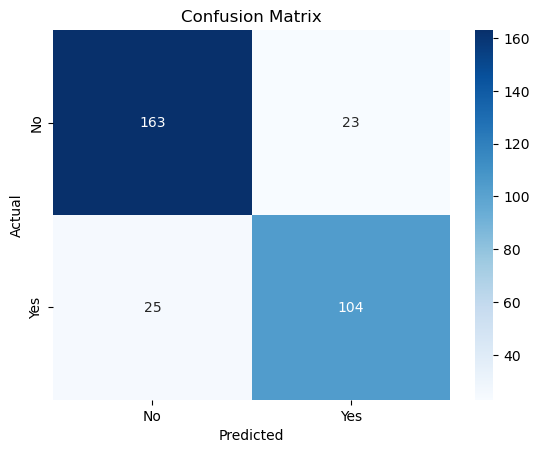

In [96]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

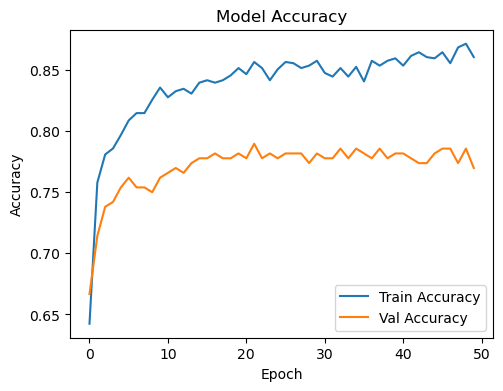

In [110]:
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

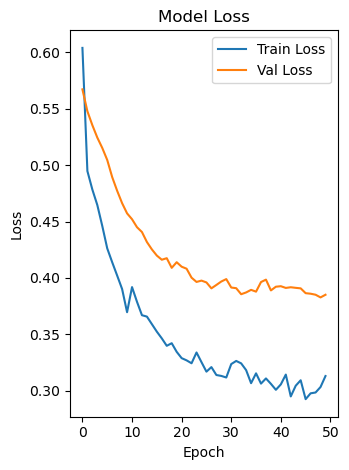

In [112]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
